In [3]:
import numpy as np
from scipy.integrate import solve_ivp

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 64, 6401

def lorenz(t, X, sigma, beta, rho):
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

#IVP1
u01, v01, w01 = 0, 1, 1.04
#IVP2
u02, v02, w02 = 0, 1, 1.05

#time steps array
t = np.linspace(0, tmax, n)

# Integrate the Lorenz equations for IVP1
soln = solve_ivp(lorenz, (0, tmax), (u01, v01, w01), args=(sigma, beta, rho),
                 dense_output=True)

# Interpolate solution onto the time grid, t.
x1, y1, z1 = soln.sol(t)

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (u02, v02, w02), args=(sigma, beta, rho),
                 dense_output=True)

# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x2, y2, z2 = soln.sol(t)

In [4]:
x1_sub = np.zeros(65)
x2_sub = np.zeros(65)
for i in range(0, 6401, 100):
    j = int(i/100)
    x1_sub[j] = x1[i]
    x2_sub[j] = x2[i]

In [5]:
def func(x1,x2):
    out = []
    for x in x2:
        j = -1
        y = 0
        for i in range(len(x1)):
            if(x1[i] >= x):
                if(j==-1):
                    y = x1[i]
                    j = i
                elif(x1[i] < y):
                    y = x1[i]
                    j = i
        out.append(j)
    return out

In [73]:
output = func(x1_sub,x2_sub)
print(output)
print(output[26])

[0, 1, 14, 3, 51, 7, 6, 46, 51, 45, 10, 1, 12, 44, 14, 15, 59, 17, 25, 34, 56, 21, 31, 6, -1, 22, 6, 49, 32, 6, -1, 49, 22, 40, 28, 57, 56, 61, 48, 60, 31, 32, 6, 58, 55, 36, 12, 31, 31, 6, 32, 3, 50, 35, 22, 56, 49, 31, 54, 6, 61, 7, 60, 31, 32]
6


In [7]:
class Note:
    def __init__(self, value, length):
        self.value = value
        self.length = length

p1 = Note("A",0.25)

print(p1.value)
print(p1.length)

A
0.25


In [8]:
class Bar:
    length = 4
    def __init__(self, notes):
        self.notes = notes

p1 = Bar([Note("A",1.0),Note("B",2.0),Note("C",1.0)])

print(p1.notes[0].value)
print(p1.notes[1].value)
print(p1.notes[2].value)
print(p1.length)

A
B
C
4


In [9]:
def getTotalLength(NoteSequence):
    out = 0
    for x in NoteSequence:
        out += x.length
    return out

In [10]:
def notesToBar(NoteSequence):
    out = []
    temp = Bar([])
    total_length = getTotalLength(temp.notes)
    for x in NoteSequence:
        if(total_length < temp.length):
            temp.notes.append(x)
            total_length = getTotalLength(temp.notes)
            if(total_length == temp.length):
                out.append(temp)
                temp = Bar([])
                total_length = getTotalLength(temp.notes)
    return out

In [11]:
NoteSequence = [Note("A",1.0),Note("B",2.0),Note("C",1.0),Note("D",0.25),Note("E",0.75),Note("F",2.0),Note("G",1.0)]
output = notesToBar(NoteSequence)

In [12]:
print(output[0].notes[0].value)
print(output[0].notes[1].value)
print(output[0].notes[2].value)
print(output[1].notes[0].value)
print(output[1].notes[1].value)
print(output[1].notes[2].value)
print(output[1].notes[3].value)

A
B
C
D
E
F
G


In [69]:
out = []
for i in range(len(x2_sub)):
    if(x2_sub[i]>x1_sub[26]):
        out.append(i)
print(out)

[16, 20, 24, 30, 33, 36, 45, 52, 55, 58]


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]


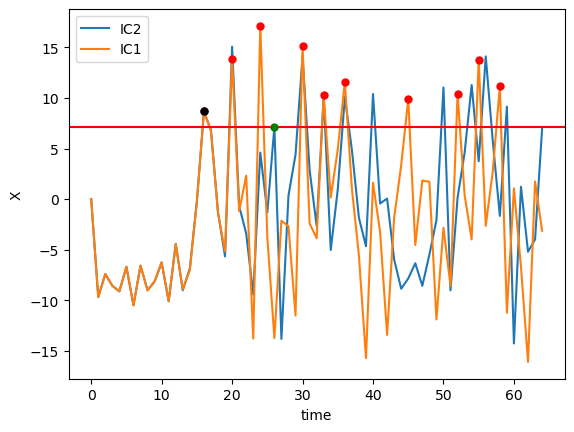

In [84]:
import matplotlib.pyplot as plt 

print(t_sub)

plt.plot(t_sub ,x1_sub , label = "IC2") 
plt.plot(t_sub ,x2_sub , label = "IC1") 

plt.axhline(y=x1_sub[26], color='r', linestyle='-')
# naming the x axis 
plt.xlabel('time') 
# naming the y axis
plt.ylabel('X')
# giving a title to my graph

plt.plot(t_sub[26], x1_sub[26], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

for x in out:
    plt.plot(t_sub[x], x2_sub[x], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

plt.plot(t_sub[16], x2_sub[16], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="black")

# show a legend on the plot
plt.legend() 

plt.savefig('lorentz.png')
# function to show the plot 
plt.show() 

In [49]:
print(x1_sub[24])

4.597240490496914


In [30]:
t_sub[17]

17.0

In [32]:
print(x1_sub)

[  0.          -9.68768357  -7.41274539  -8.57557169  -9.12337068
  -6.69369365 -10.50517072  -6.58525193  -9.01233856  -8.15555462
  -6.26163348 -10.11172027  -4.42799619  -9.01611073  -6.85476851
  -0.21317397   8.64606703   6.8147917   -1.3143058   -5.6736291
  15.06607321  -0.69018794  -3.40893915  -9.43352371   4.59724049
  -1.32899674   7.14336545 -13.83189619   0.33716786   4.39095859
  14.1188268    2.87538135  -2.6689295   10.16629011  -5.0396957
   0.96694385  10.10423759   4.87067952  -1.84983398  -4.66700925
  10.38971786  -0.43718544   0.04756834  -5.98023169  -8.86529115
  -7.85290403  -6.34626039  -8.57433005  -5.49950878  -2.09192553
  11.03144339  -9.02477771   0.1334258    4.56395918  11.27520553
   3.74485818  14.10363546   5.72422767  -1.66834079   9.14478496
 -14.27523265   1.22284645  -5.20985512  -3.99120549   6.97059897]
